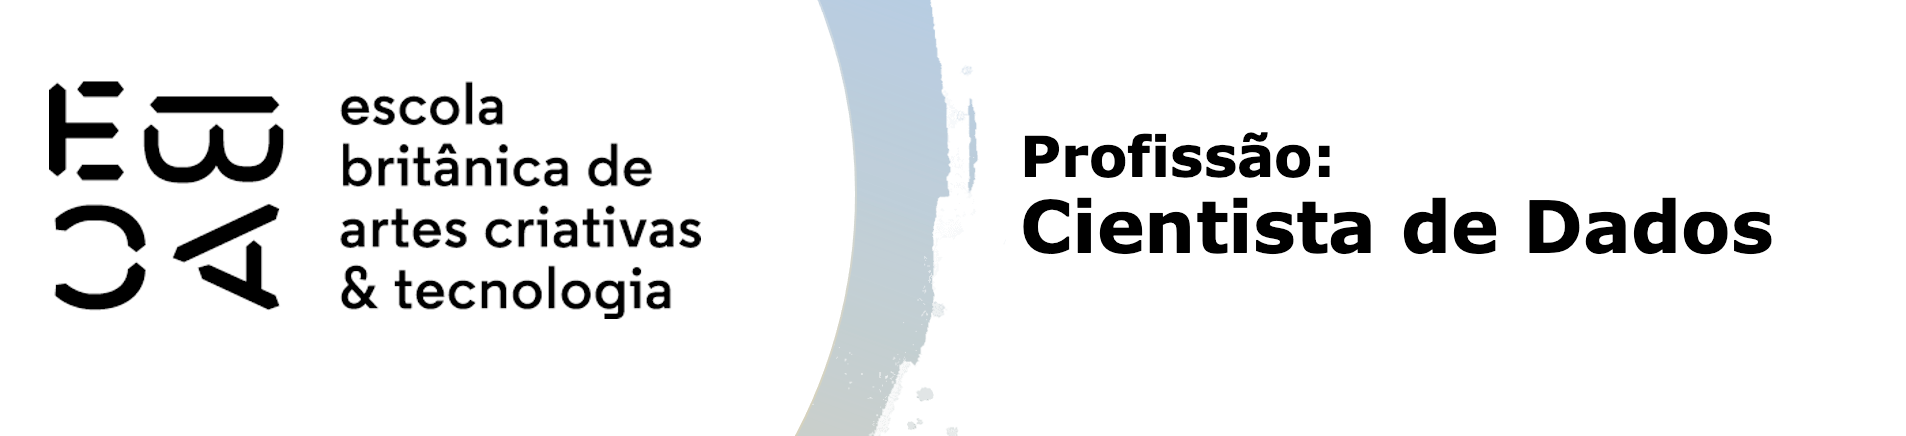

# Tarefa I

Neste projeto, estamos construindo um credit scoring para cartão de crédito, em um desenho amostral com 15 safras, e utilizando 12 meses de performance.

Carregue a base de dados ```credit_scoring.ftr```.

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import t
from pycaret.classification import *

import warnings
warnings.filterwarnings("ignore")

df = pd.read_feather('credit_scoring.ftr')
df.head()

df = pd.read_feather('credit_scoring.ftr')
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau
0,2015-01-01,5733,F,N,N,0,Empresário,Médio,Solteiro,Casa,43,6.873973,1.0,2515.39,False
1,2015-01-01,727,F,S,S,0,Assalariado,Médio,Casado,Casa,35,4.526027,2.0,3180.19,False
2,2015-01-01,6374,F,N,N,2,Assalariado,Médio,Casado,Casa,31,0.243836,4.0,1582.29,False
3,2015-01-01,9566,F,N,N,0,Assalariado,Médio,Casado,Casa,54,12.772603,2.0,13721.17,False
4,2015-01-01,9502,F,S,N,0,Assalariado,Superior incompleto,Solteiro,Casa,31,8.432877,1.0,2891.08,False


In [8]:
#verifica a dimensão do dataframe
dataset=df.shape
dataset

(750000, 15)

In [9]:
dataset = df.sample(50000)

## Amostragem

Separe os três últimos meses como safras de validação *out of time* (oot).

Variáveis:<br>
Considere que a variável ```data_ref``` não é uma variável explicativa, é somente uma variável indicadora da safra, e não deve ser utilizada na modelagem. A variávei ```index``` é um identificador do cliente, e também não deve ser utilizada como covariável (variável explicativa). As restantes podem ser utilizadas para prever a inadimplência, incluindo a renda.


In [10]:
#Data minima
df.data_ref.min()

Timestamp('2015-01-01 00:00:00')

In [11]:
#Data maxima
df.data_ref.max()

Timestamp('2016-03-01 00:00:00')

In [12]:
# Retornando os ultimos 3 meses
meses = 3
data = pd.Series(pd.date_range('1/1/2016', periods = meses, freq = 'MS'))
date = pd.DataFrame(data)
date = date.rename({0:'oot'}, axis = 'columns')
date

,oot
0,2016-01-01
1,2016-02-01
2,2016-03-01


## Descritiva básica univariada

- Descreva a base quanto ao número de linhas, número de linhas para cada mês em ```data_ref```.
- Faça uma descritiva básica univariada de cada variável. Considere as naturezas diferentes: qualitativas e quantitativas.

In [13]:
print('número de linhas: {0}'.format(df.shape[0]))
date.value_counts()
df.data_ref.value_counts()

número de linhas: 750000


2015-01-01    50000
2015-02-01    50000
2015-03-01    50000
2015-04-01    50000
2015-05-01    50000
2015-06-01    50000
2015-07-01    50000
2015-08-01    50000
2015-09-01    50000
2015-10-01    50000
2015-11-01    50000
2015-12-01    50000
2016-01-01    50000
2016-02-01    50000
2016-03-01    50000
Name: data_ref, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   data_ref               750000 non-null  datetime64[ns]
 1   index                  750000 non-null  int64         
 2   sexo                   750000 non-null  object        
 3   posse_de_veiculo       750000 non-null  object        
 4   posse_de_imovel        750000 non-null  object        
 5   qtd_filhos             750000 non-null  int64         
 6   tipo_renda             750000 non-null  object        
 7   educacao               750000 non-null  object        
 8   estado_civil           750000 non-null  object        
 9   tipo_residencia        750000 non-null  object        
 10  idade                  750000 non-null  int64         
 11  tempo_emprego          624043 non-null  float64       
 12  qt_pessoas_residencia  750000 non-null  floa

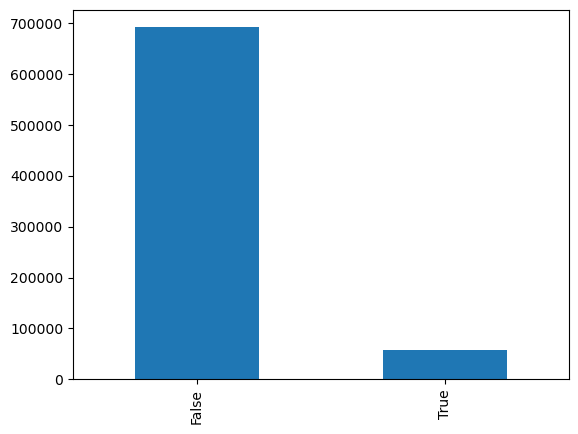

In [15]:
var = 'mau'
grafico_barras = df[var].value_counts().plot.bar()

<Figure size 640x480 with 0 Axes>

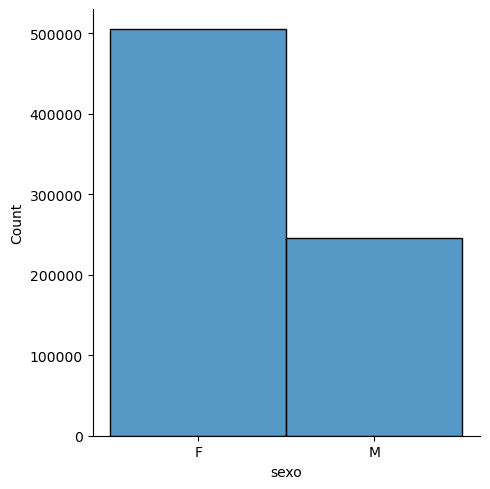

In [16]:
df.sexo.value_counts()
plt.clf()
var = "sexo"
sns.displot(df, x = var, bins = 50)
plt.show()

<Figure size 640x480 with 0 Axes>

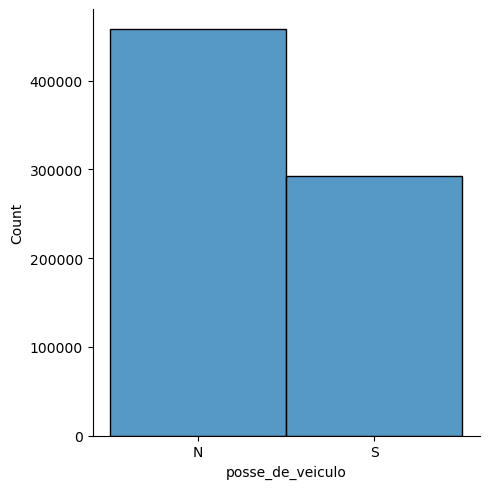

In [17]:
df.posse_de_veiculo.value_counts()
plt.clf()
var = "posse_de_veiculo"
sns.displot(df, x = var, bins = 50)
plt.show()

<Figure size 640x480 with 0 Axes>

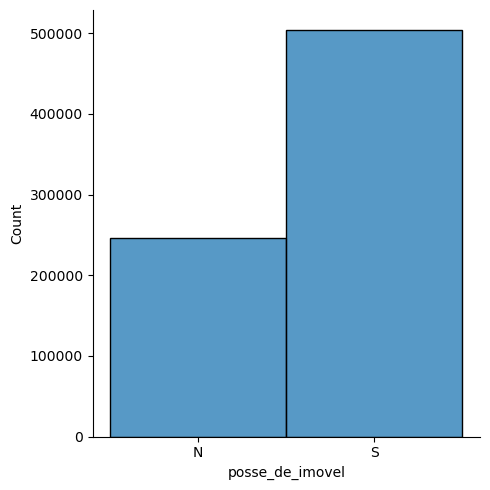

In [18]:
df.posse_de_imovel.value_counts()
plt.clf()
var = "posse_de_imovel"
sns.displot(df, x = var, bins = 50)
plt.show()

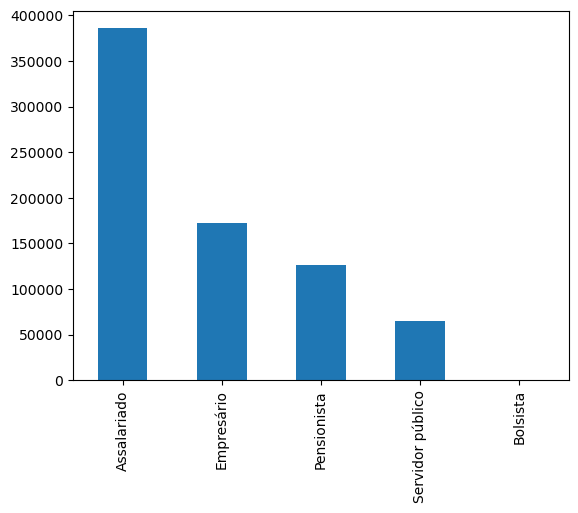

In [19]:
var = 'tipo_renda'
grafico_barras = df[var].value_counts().plot.bar()

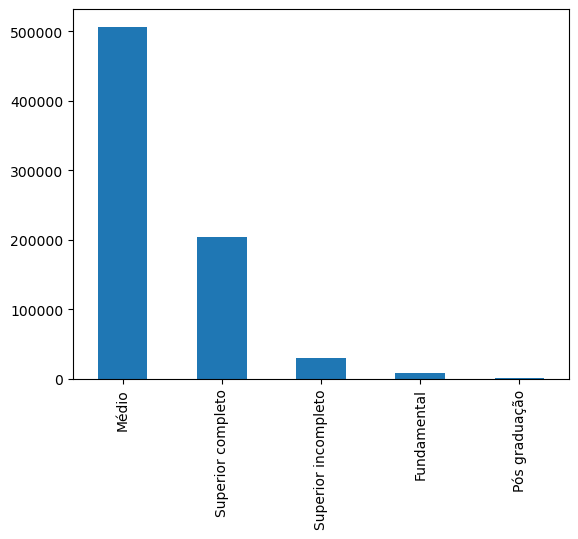

In [20]:
var = 'educacao'
grafico_barras = df[var].value_counts().plot.bar()

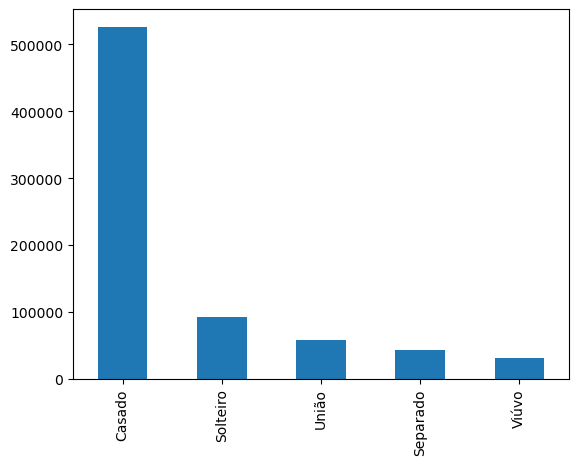

In [21]:
var = 'estado_civil'
grafico_barras = df[var].value_counts().plot.bar()

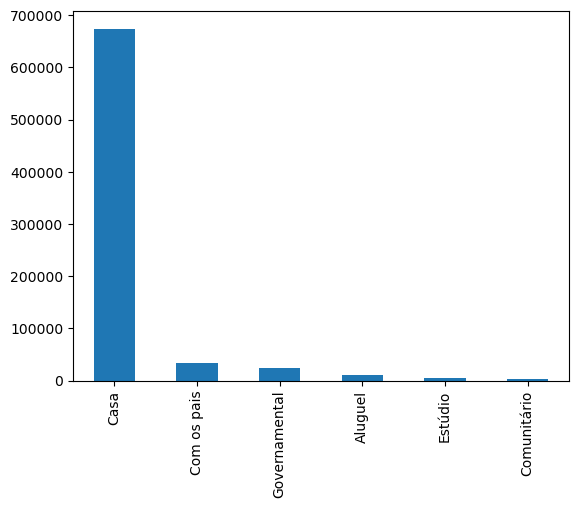

In [22]:
var = 'tipo_residencia'
grafico_barras = df[var].value_counts().plot.bar()

<Figure size 640x480 with 0 Axes>

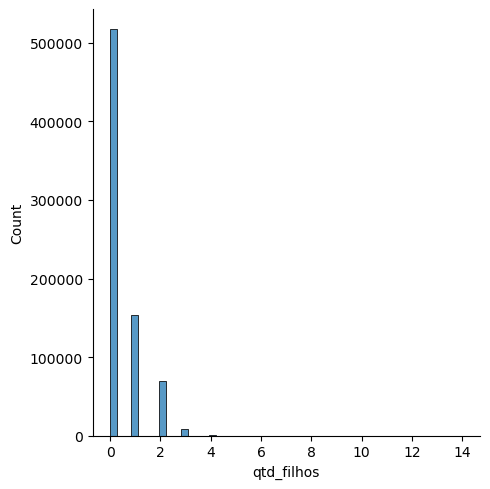

In [23]:
plt.clf()
var = "qtd_filhos"
sns.displot(df, x = var, bins = 50)
plt.show()

<Figure size 640x480 with 0 Axes>

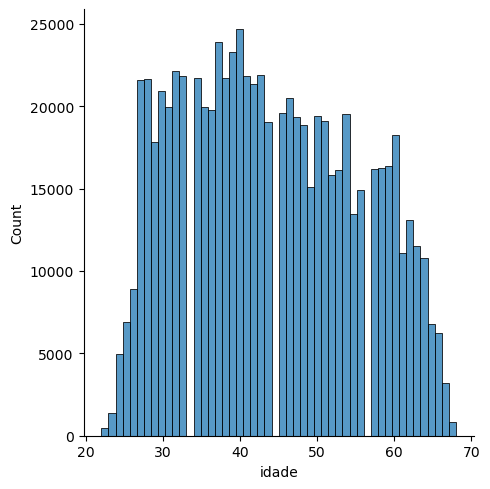

In [24]:
plt.clf()
var = "idade"
sns.displot(df, x = var, bins = 50)
plt.show()

<Figure size 640x480 with 0 Axes>

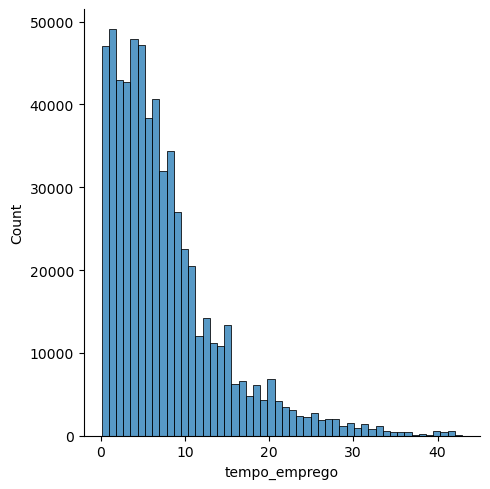

In [25]:
plt.clf()
var = "tempo_emprego"
sns.displot(df, x = var, bins = 50)
plt.show()

<Figure size 640x480 with 0 Axes>

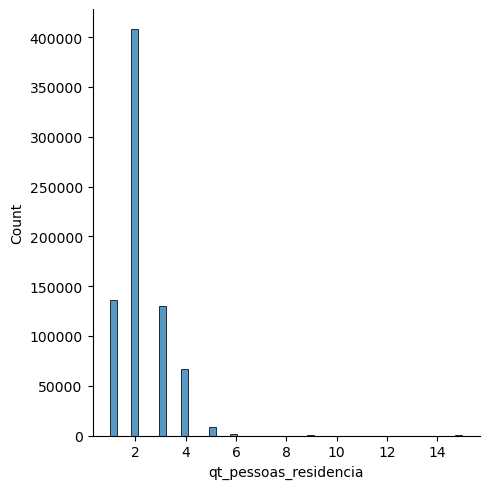

In [26]:
plt.clf()
var = "qt_pessoas_residencia"
sns.displot(df, x = var, bins = 50)
plt.show()

<Figure size 640x480 with 0 Axes>

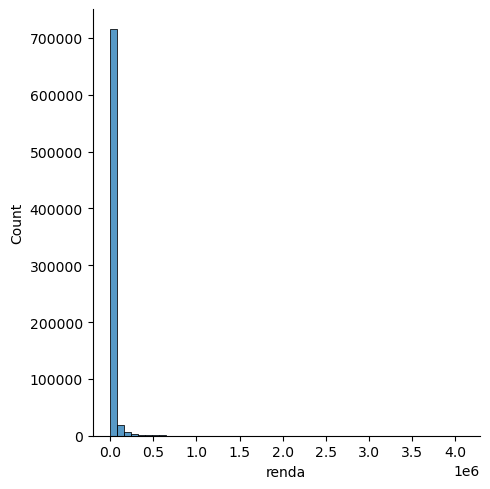

In [27]:
plt.clf()
var = "renda"
sns.displot(df, x = var, bins = 50)
plt.show()

## Descritiva bivariada

Faça uma análise descritiva bivariada de cada variável

<Axes: xlabel='sexo', ylabel='mau'>

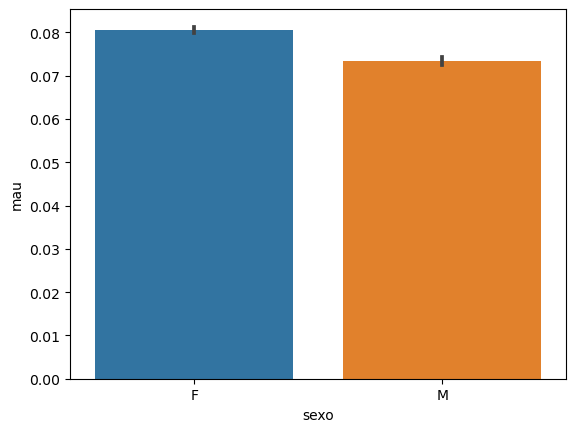

In [28]:
sns.barplot(x='sexo', y = 'mau', data=df)

<Axes: xlabel='posse_de_veiculo', ylabel='mau'>

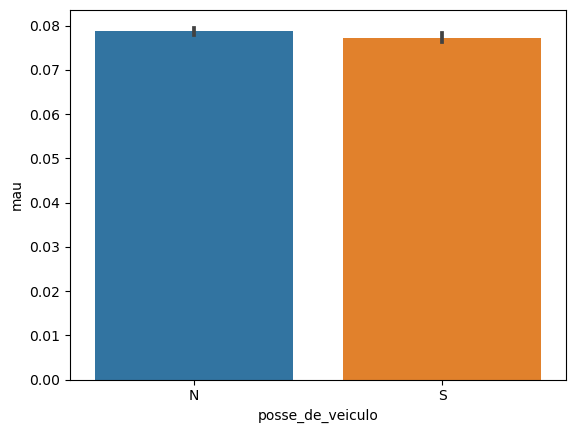

In [29]:
sns.barplot(x='posse_de_veiculo', y = 'mau', data=df)

<Axes: xlabel='posse_de_imovel', ylabel='mau'>

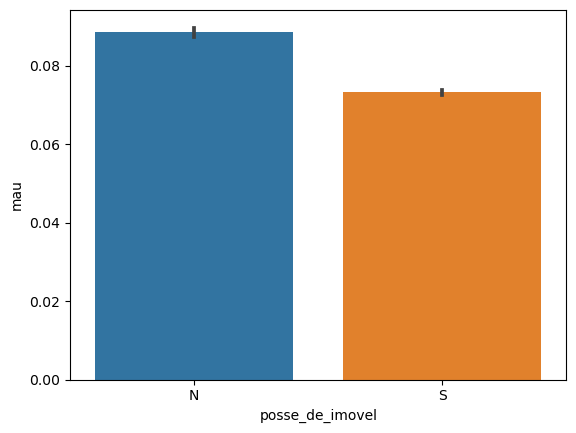

In [30]:
sns.barplot(x='posse_de_imovel', y = 'mau', data=df)

<Axes: xlabel='tipo_renda', ylabel='mau'>

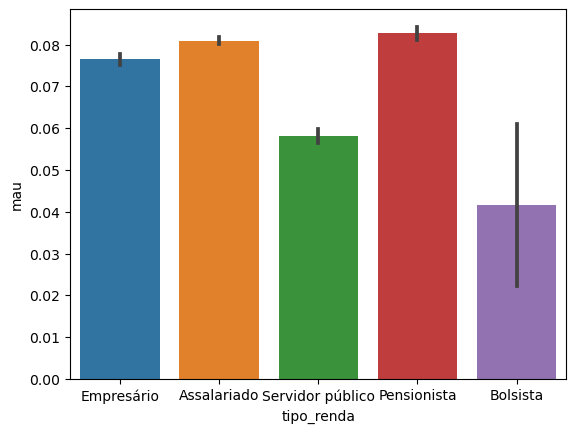

In [31]:
sns.barplot(x='tipo_renda', y = 'mau', data=df)

[Text(0, 0, 'Médio'),
 Text(1, 0, 'Superior incompleto'),
 Text(2, 0, 'Superior completo'),
 Text(3, 0, 'Fundamental'),
 Text(4, 0, 'Pós graduação')]

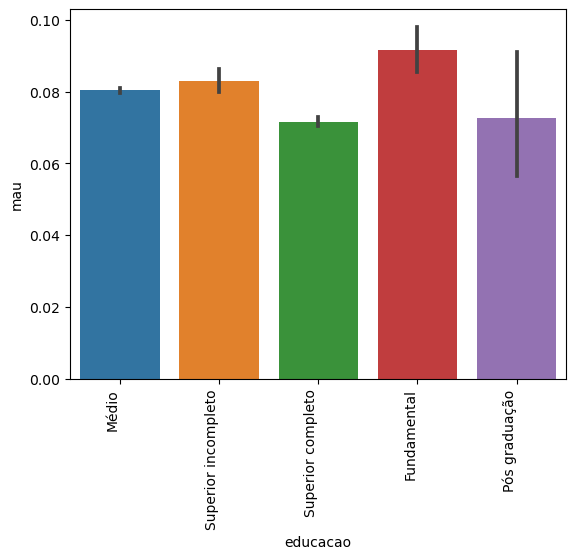

In [32]:
educacao = sns.barplot(x='educacao', y = 'mau', data=df)
educacao.set_xticklabels(educacao.get_xticklabels(), rotation=90, horizontalalignment='right')

<Axes: xlabel='estado_civil', ylabel='mau'>

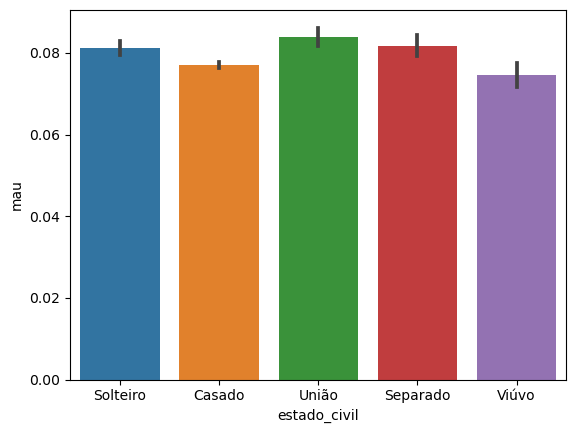

In [33]:
sns.barplot(x='estado_civil', y = 'mau', data=df)

[Text(0, 0, 'Casa'),
 Text(1, 0, 'Com os pais'),
 Text(2, 0, 'Aluguel'),
 Text(3, 0, 'Comunitário'),
 Text(4, 0, 'Governamental'),
 Text(5, 0, 'Estúdio')]

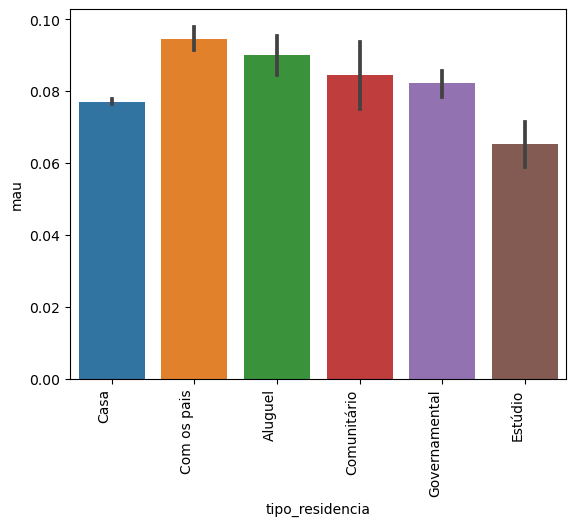

In [34]:
tipo_residencia = sns.barplot(x='tipo_residencia', y = 'mau', data=df)    
tipo_residencia.set_xticklabels(tipo_residencia.get_xticklabels(), rotation=90, horizontalalignment='right')

## Desenvolvimento do modelo

Desenvolva um modelo de *credit scoring* através de uma regressão logística.

- Trate valores missings e outliers
- Trate 'zeros estruturais'
- Faça agrupamentos de categorias conforme vimos em aula
- Proponha uma equação preditiva para 'mau'
- Caso hajam categorias não significantes, justifique

In [35]:
df.drop(['data_ref','index'], axis=1, inplace=True)

In [36]:
df.isna().sum()

sexo                          0
posse_de_veiculo              0
posse_de_imovel               0
qtd_filhos                    0
tipo_renda                    0
educacao                      0
estado_civil                  0
tipo_residencia               0
idade                         0
tempo_emprego            125957
qt_pessoas_residencia         0
renda                         0
mau                           0
dtype: int64

In [37]:
df['tempo_emprego'].fillna(df['tempo_emprego'].mean())

0          6.873973
1          4.526027
2          0.243836
3         12.772603
4          8.432877
            ...    
749995     3.038356
749996     7.748574
749997    10.375342
749998    13.780822
749999    10.375342
Name: tempo_emprego, Length: 750000, dtype: float64

In [38]:
df['mau'] = df.mau.astype('int64')

In [59]:
df = df.sample(frac=0.95, random_state=786)
df_unseen = df.drop(df.index)
df.reset_index(inplace=True, drop=True)
df_unseen.reset_index(inplace=True, drop=True)
print('Conjunto de dados para modelagem (treino e teste): ' + str(data.shape))
print('Conjunto de dados não usados no treino/teste, apenas como validação: ' + str(data_unseen.shape))

Conjunto de dados para modelagem (treino e teste): (47500, 15)
Conjunto de dados não usados no treino/teste, apenas como validação: (2500, 15)


In [60]:
def IV(variavel, resposta):
    tab = pd.crosstab(variavel, resposta, margins=True, margins_name='total')

    rótulo_evento = tab.columns[0]
    rótulo_nao_evento = tab.columns[1]

    tab['pct_evento'] = tab[rótulo_evento]/tab.loc['total',rótulo_evento]
    tab['ep'] = tab[rótulo_evento]/tab.loc['total',rótulo_evento]
    
    tab['pct_nao_evento'] = tab[rótulo_nao_evento]/tab.loc['total',rótulo_nao_evento]
    tab['woe'] = np.log(tab.pct_evento/tab.pct_nao_evento)
    tab['iv_parcial'] = (tab.pct_evento - tab.pct_nao_evento)*tab.woe
    return tab['iv_parcial'].sum()

In [61]:
iv_sexo = IV(df.sexo, df.mau)
print(f'IV da variável SEXO: {iv_sexo:.1%}')

IV da variável SEXO: 0.2%


In [62]:
metadados = pd.DataFrame(df.dtypes, columns=['dtype'])
metadados['valores_unicos'] = df.nunique()
metadados['variavel'] = 'covariavel'
metadados.loc['mau','variavel'] = 'resposta'
metadados.loc['bom','variavel'] = 'resposta'
metadados

,dtype,valores_unicos,variavel
sexo,object,2,covariavel
posse_de_veiculo,object,2,covariavel
posse_de_imovel,object,2,covariavel
qtd_filhos,float64,8,covariavel
tipo_renda,object,5,covariavel
educacao,object,5,covariavel
estado_civil,object,5,covariavel
tipo_residencia,object,6,covariavel
idade,int64,47,covariavel
tempo_emprego,float64,3004,covariavel


In [63]:
var='idade'
IV(pd.qcut(df[var],5,duplicates='drop'), df.mau)

0.017893507264258108

In [64]:
for var in metadados[metadados.variavel=='covariavel'].index:
    if (metadados.loc[var, 'valores_unicos']>6):
        metadados.loc[var, 'IV'] = IV(pd.qcut(df[var],5,duplicates='drop'), df.mau)
    else:
        metadados.loc[var, 'IV'] = IV(df[var], df.mau)
        
        
metadados

,dtype,valores_unicos,variavel,IV
sexo,object,2,covariavel,0.002383
posse_de_veiculo,object,2,covariavel,0.000124
posse_de_imovel,object,2,covariavel,0.009955
qtd_filhos,float64,8,covariavel,0.000051
tipo_renda,object,5,covariavel,0.009124
educacao,object,5,covariavel,0.003349
estado_civil,object,5,covariavel,0.001076
tipo_residencia,object,6,covariavel,0.003013
idade,int64,47,covariavel,0.017894
tempo_emprego,float64,3004,covariavel,0.349126


In [65]:
def biv_discreta(var, df):
    df['bom'] = 1-df.mau
    g = df.groupby(var)
    
    biv = pd.DataFrame({'qt_bom': g['bom'].sum(),
                       'qt_mau': g['bom'].sum(),
                       'mau':g['bom'].mean(),
                       var: g['bom'].mean().index,
                       'cont':g[var].count()})
    biv['ep'] = (biv.mau*(1-biv.mau)/biv.cont)**.5
    biv['mau_sup'] = biv.mau+t.ppf([0.975], biv.cont-1)*biv.ep
    biv['mau_inf'] = biv.mau+t.ppf([0.025], biv.cont-1)*biv.ep
    
    biv['logit'] = np.log(biv.mau/(1-biv.mau))
    biv['logit_sup'] = np.log(biv.mau_sup/(1-biv.mau_sup))
    biv['logit_inf'] = np.log(biv.mau_sup/(1-biv.mau_inf))
    
    tx_mau_geral = df.mau.mean()
    woe_geral = np.log(df.mau.mean() / (1 - df.mau.mean()))
    
    biv['woe'] = biv.logit - woe_geral
    biv['woe_sup'] = biv.logit_sup - woe_geral
    biv['woe_inf'] = biv.logit_inf - woe_geral
    
    fig, ax = plt.subplots(2,1, figsize=(8,6))
    ax[0].plot(biv[var], biv.woe,  ':bo', label='woe')
    ax[0].plot(biv[var], biv.woe_sup, 'o:r', label='limite superior')
    ax[0].plot(biv[var], biv.woe_inf, 'o:r', label='limite superior')
        
    num_cat = biv.shape[0]
    ax[0].set_xlim([-.3, num_cat-.7])
    
    ax[0].set_ylabel("Weight of Evidence")
    ax[0].legend(bbox_to_anchor=(.83, 1.17), ncol=3)
    
    ax[0].set_xticks(list(range(num_cat)))
    ax[0].set_xticklabels(biv[var], rotation=15)
    
    ax[1] = biv.cont.plot.bar()
    return biv

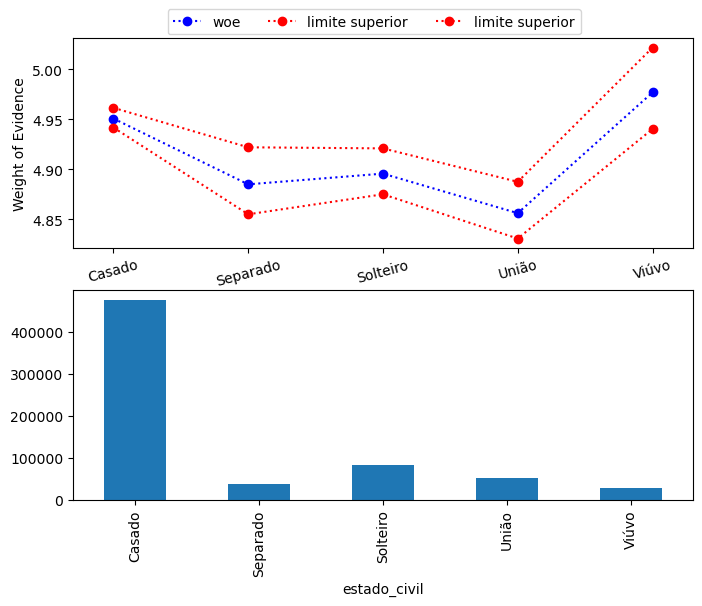

In [66]:
biv_discreta('estado_civil', df);

0.009014034613749104

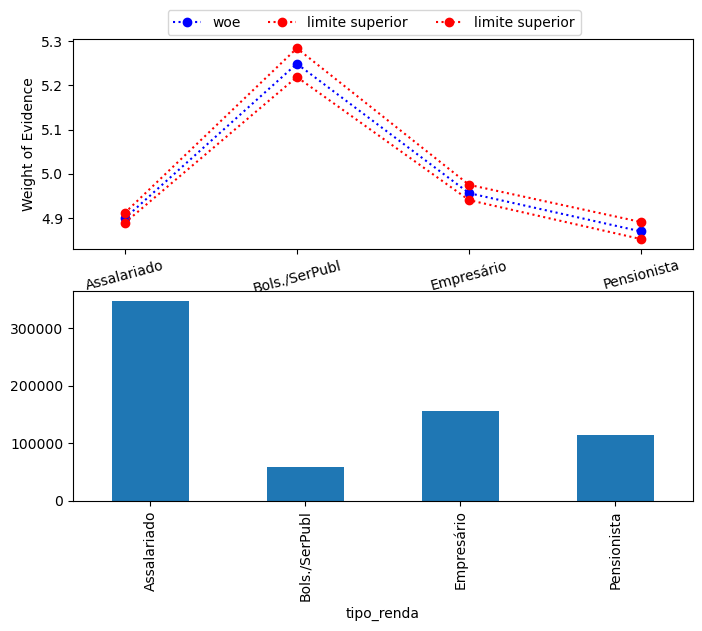

In [67]:
df2 = df.copy()
df2.tipo_renda.replace({'Bolsista': 'Bols./SerPubl', 'Servidor público': 'Bols./SerPubl'}, inplace=True)
biv_discreta('tipo_renda', df2)
IV(df2.tipo_renda, df.mau)

0.003348482401761131

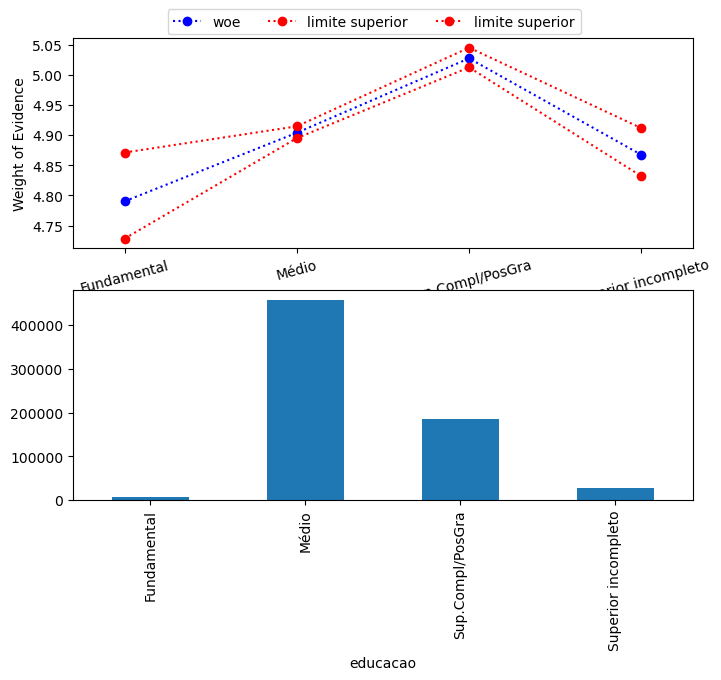

In [68]:
df2.educacao.replace({'Superior completo': 'Sup.Compl/PosGra', 'Pós graduação': 'Sup.Compl/PosGra'}, inplace=True)
biv_discreta('educacao', df2)
IV(df2.educacao, df.mau)

0.002293270908337662

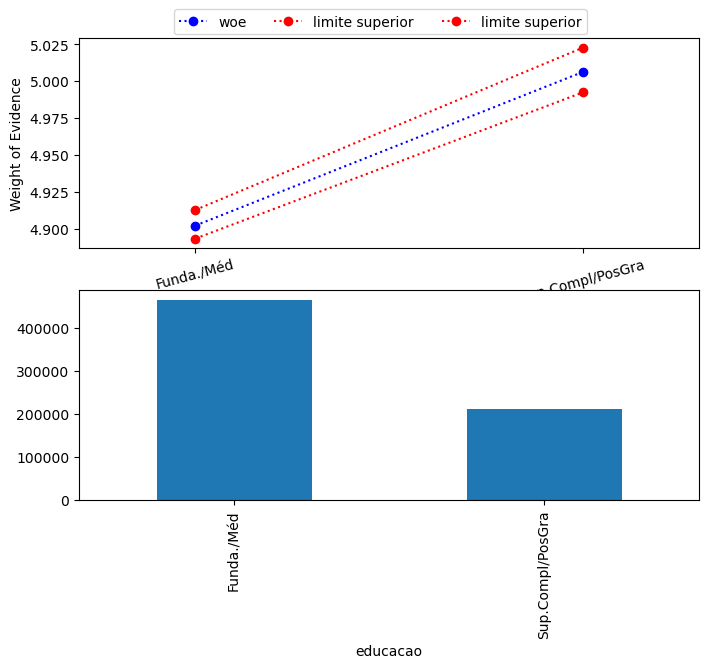

In [69]:
df2.educacao.replace({'Superior incompleto':'Sup.Compl/PosGra', 
                      'Fundamental':'Funda./Méd',
                      'Médio': 'Funda./Méd'
                     }, inplace=True)
biv_discreta('educacao', df2)
IV(df2.educacao, df.mau)

In [70]:
df.dtypes

sexo                      object
posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos               float64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
renda                    float64
mau                        int64
bom                        int64
dtype: object

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676875 entries, 0 to 676874
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   sexo                   676875 non-null  object 
 1   posse_de_veiculo       676875 non-null  object 
 2   posse_de_imovel        676875 non-null  object 
 3   qtd_filhos             676875 non-null  float64
 4   tipo_renda             676875 non-null  object 
 5   educacao               676875 non-null  object 
 6   estado_civil           676875 non-null  object 
 7   tipo_residencia        676875 non-null  object 
 8   idade                  676875 non-null  int64  
 9   tempo_emprego          563087 non-null  float64
 10  qt_pessoas_residencia  676875 non-null  float64
 11  renda                  676875 non-null  float64
 12  mau                    676875 non-null  int64  
 13  bom                    676875 non-null  int64  
dtypes: float64(4), int64(3), object(7)
m

In [75]:
df.corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,mau,bom
qtd_filhos,1.000000,-0.370435,-0.075643,0.890352,-0.042466,0.007120,-0.007120
idade,-0.370435,1.000000,0.329763,-0.341378,0.101867,-0.027601,0.027601
tempo_emprego,-0.075643,0.329763,1.000000,-0.066545,0.497921,-0.131738,0.131738
qt_pessoas_residencia,0.890352,-0.341378,-0.066545,1.000000,-0.048067,0.004017,-0.004017
renda,-0.042466,0.101867,0.497921,-0.048067,1.000000,-0.068299,0.068299
mau,0.007120,-0.027601,-0.131738,0.004017,-0.068299,1.000000,-1.000000
bom,-0.007120,0.027601,0.131738,-0.004017,0.068299,-1.000000,1.000000


In [76]:
df.mau.value_counts(normalize=True)

0    0.921788
1    0.078212
Name: mau, dtype: float64

In [80]:
exp_clf1 = setup(data = df, target = 'mau', session_id=123) 

,Description,Value
0,Session id,123
1,Target,mau
2,Target type,Binary
3,Original data shape,"(750000, 15)"
4,Transformed data shape,"(750000, 34)"
5,Transformed train set shape,"(525000, 34)"
6,Transformed test set shape,"(225000, 34)"
7,Ordinal features,3
8,Numeric features,6
9,Date features,1


## Avaliação do modelo

Avalie o poder discriminante do modelo pelo menos avaliando acurácia, KS e Gini.

Avalie estas métricas nas bases de desenvolvimento e *out of time*.

In [81]:
pd.crosstab(df['mau'], date['oot'])

oot,2016-01-01,2016-02-01,2016-03-01
mau,,,
False,1,1,1


In [85]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

from pycaret.utils.generic import check_metric

A função pd.crosstab() é usada para calcular uma tabela de frequência cruzada entre duas variáveis. No exemplo dado, df['mau'] representa uma variável chamada "mau" em um DataFrame chamado "df", enquanto date['oot'] representa uma variável chamada "oot" em um DataFrame chamado "date". A função pd.crosstab(df['mau'], date['oot']) irá calcular a tabela de frequência cruzada entre essas duas variáveis.

# a - Criar um pipeline utilizando o sklearn pipeline para o preprocessamento 

## Pré processamento

Nesse código, está sendo feito o carregamento de um conjunto de dados chamado "digits", dividindo-o em conjuntos de treinamento e teste. Em seguida, é aplicada uma técnica de redução de dimensionalidade chamada PCA, seguida de um escalonamento dos dados. Por fim, é utilizado um algoritmo de regressão logística para realizar a classificação.

In [86]:
X_digits, y_digits = load_digits(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.3, random_state=10)

pca = PCA(n_components=20)

scaler = StandardScaler()

logistic = LogisticRegression(max_iter=200)

In [88]:
X_digits.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [89]:
X_digits.shape

(1797, 64)

In [90]:
X_train.shape

(1257, 64)

In [91]:
# "Fitando" e aplicando Z score nos dados de treino
scaler.fit(X_train)
X_train = scaler.transform(X_train)

### Substituição de nulos (nans)

Existe nulos na base? é dado numérico ou categórico? qual o valor de substituição? média? valor mais frequente? etc

### Remoção de outliers

Como identificar outlier? Substituir o outlier por algum valor? Remover a linha?

### Seleção de variáveis

Qual tipo de técnica? Boruta? Feature importance? 

### Redução de dimensionalidade (PCA)

Aplicar PCA para reduzir a dimensionalidade para 5

In [92]:
pca.fit(X_train)
X_train =  pca.transform(X_train)

In [93]:
# "Fitando" e predizendo uma regressão logística nos dados de treino
logistic.fit(X_train, y_train)

logistic.predict(X_train)

array([0, 0, 0, ..., 2, 1, 2])

In [94]:
# Aplicando nos dados de teste o Z score "fitado" nos dados de treino  
X_test = scaler.transform(X_test)

In [95]:
# Aplicando nos dados de teste o PCA "fitado" nos dados de treino  
X_test = pca.transform(X_test)

In [96]:
# Predizendo nos dados de teste o modelo "fitado" nos dados de treino
logistic.predict(X_test)

array([5, 2, 5, 4, 8, 3, 4, 3, 3, 0, 8, 7, 0, 1, 8, 6, 9, 7, 9, 7, 1, 6,
       6, 7, 8, 8, 5, 8, 9, 9, 3, 3, 7, 3, 4, 1, 9, 2, 5, 4, 2, 1, 0, 1,
       2, 2, 6, 1, 9, 4, 4, 5, 8, 4, 8, 5, 9, 7, 8, 0, 4, 5, 8, 4, 7, 9,
       0, 7, 1, 3, 9, 3, 3, 8, 0, 7, 3, 6, 5, 2, 0, 8, 8, 0, 1, 2, 2, 8,
       8, 8, 2, 6, 3, 4, 7, 9, 8, 2, 9, 2, 5, 0, 8, 0, 4, 8, 8, 0, 6, 7,
       3, 3, 9, 1, 2, 4, 6, 0, 8, 8, 1, 1, 7, 3, 9, 5, 2, 3, 3, 9, 7, 6,
       2, 5, 4, 3, 8, 7, 6, 7, 2, 7, 4, 9, 5, 1, 9, 8, 6, 1, 8, 1, 4, 0,
       9, 9, 1, 2, 3, 5, 0, 3, 4, 1, 5, 4, 9, 3, 5, 6, 4, 0, 8, 6, 7, 0,
       9, 9, 4, 7, 5, 5, 2, 0, 6, 7, 5, 3, 9, 7, 1, 3, 2, 8, 3, 3, 1, 7,
       1, 1, 1, 7, 1, 6, 7, 6, 9, 5, 2, 3, 5, 2, 9, 5, 4, 8, 2, 9, 1, 5,
       4, 2, 3, 9, 0, 2, 0, 2, 1, 0, 5, 0, 6, 4, 2, 1, 9, 0, 9, 0, 6, 9,
       4, 4, 9, 7, 5, 6, 1, 5, 7, 0, 8, 6, 2, 5, 1, 2, 3, 8, 4, 4, 3, 5,
       7, 9, 7, 2, 0, 2, 0, 9, 2, 8, 6, 3, 1, 0, 6, 6, 6, 7, 1, 6, 1, 7,
       6, 0, 6, 3, 7, 4, 6, 2, 2, 0, 8, 4, 7, 3, 3,

### Criação de dummies

Aplicar o get_dummies() ou onehotencoder() para transformar colunas catégoricas do dataframe em colunas de 0 e 1. 
- sexo
- posse_de_veiculo
- posse_de_imovel
- tipo_renda
- educacao
- estado_civil
- tipo_residencia

In [97]:
# criar variáveis dummy (ou variáveis indicadoras) a partir de variáveis categóricas 
dummy = pd.get_dummies(df, columns=['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'])

In [98]:
dummy

,data_ref,index,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,mau,sexo_F,sexo_M,...,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Aluguel,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
0,2015-01-01,5733,0,43,6.873973,1.0,2515.39,False,1,0,...,0,1,0,0,0,1,0,0,0,0
1,2015-01-01,727,0,35,4.526027,2.0,3180.19,False,1,0,...,0,0,0,0,0,1,0,0,0,0
2,2015-01-01,6374,2,31,0.243836,4.0,1582.29,False,1,0,...,0,0,0,0,0,1,0,0,0,0
3,2015-01-01,9566,0,54,12.772603,2.0,13721.17,False,1,0,...,0,0,0,0,0,1,0,0,0,0
4,2015-01-01,9502,0,31,8.432877,1.0,2891.08,False,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,2016-03-01,13689,0,48,3.038356,2.0,2109.99,False,0,1,...,0,0,0,0,0,1,0,0,0,0
749996,2016-03-01,7000,0,65,NaN,1.0,1389.39,False,1,0,...,0,1,0,0,0,1,0,0,0,0
749997,2016-03-01,14023,2,43,10.375342,4.0,649.06,True,0,1,...,0,0,0,0,0,1,0,0,0,0
749998,2016-03-01,2396,0,56,13.780822,1.0,4216.72,True,1,0,...,0,0,0,1,0,1,0,0,0,0


### Pipeline 

Crie um pipeline contendo essas funções.

preprocessamento()
- substituicao de nulos
- remoção outliers
- PCA
- Criação de dummy de pelo menos 1 variável (posse_de_veiculo)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.3, random_state=10)

# Define a PCA to Linear dimensionality reduction
pca_pipe = PCA(n_components=15)

# Define a Standard Scaler to normalize inputs
scaler_pipe = StandardScaler()

# set the tolerance to a large value to make the example faster
logistic_pipe = LogisticRegression(max_iter=200)

In [100]:
pipe = Pipeline(steps=[("scaler", scaler_pipe), 
                       ("pca", pca_pipe), 
                       ("logistic", logistic_pipe)])

In [101]:
pipe.named_steps

{'scaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'pca': PCA(copy=True, iterated_power='auto', n_components=15, n_oversamples=10,
     power_iteration_normalizer='auto', random_state=None, svd_solver='auto',
     tol=0.0, whiten=False),
 'logistic': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=200,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False)}

In [102]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=15,
                     n_oversamples=10, power_iteration_normalizer='auto',
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('logistic',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=200,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [103]:
pipe.predict(X_train)

array([0, 0, 0, ..., 1, 8, 2])

In [104]:
pipe.predict(X_test)

array([5, 2, 5, 4, 8, 1, 4, 3, 3, 0, 8, 7, 0, 1, 8, 6, 9, 7, 9, 7, 1, 6,
       6, 7, 8, 8, 5, 8, 9, 9, 3, 3, 7, 3, 4, 1, 9, 2, 5, 4, 2, 1, 0, 1,
       2, 3, 6, 1, 9, 4, 4, 9, 8, 4, 8, 5, 9, 7, 1, 0, 4, 5, 8, 4, 7, 9,
       0, 7, 1, 3, 3, 3, 3, 8, 0, 7, 3, 6, 5, 2, 0, 8, 8, 0, 1, 2, 2, 8,
       8, 8, 2, 6, 3, 4, 7, 9, 8, 2, 9, 2, 5, 0, 8, 0, 4, 8, 8, 0, 6, 7,
       3, 3, 9, 1, 2, 4, 6, 0, 8, 8, 1, 1, 7, 8, 9, 5, 2, 3, 3, 9, 7, 6,
       2, 5, 4, 3, 8, 4, 6, 7, 2, 7, 4, 9, 5, 1, 9, 8, 6, 1, 8, 1, 4, 0,
       9, 9, 1, 2, 3, 5, 0, 3, 4, 1, 5, 4, 9, 3, 5, 6, 4, 0, 8, 6, 7, 0,
       9, 9, 4, 7, 9, 5, 2, 0, 6, 7, 5, 3, 9, 7, 1, 3, 2, 8, 8, 3, 1, 7,
       1, 1, 1, 7, 1, 6, 7, 6, 9, 5, 2, 3, 5, 2, 9, 5, 4, 8, 2, 0, 1, 5,
       4, 2, 3, 9, 0, 2, 0, 2, 1, 0, 5, 0, 6, 4, 2, 1, 9, 0, 9, 0, 6, 9,
       4, 4, 9, 7, 5, 6, 1, 8, 7, 0, 8, 6, 2, 5, 1, 2, 3, 8, 4, 4, 3, 5,
       7, 9, 7, 2, 0, 2, 0, 9, 2, 8, 6, 3, 1, 0, 6, 6, 6, 7, 1, 6, 1, 7,
       6, 0, 6, 3, 7, 4, 6, 2, 2, 0, 8, 4, 7, 3, 3,

In [105]:
pipe.named_steps

{'scaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'pca': PCA(copy=True, iterated_power='auto', n_components=15, n_oversamples=10,
     power_iteration_normalizer='auto', random_state=None, svd_solver='auto',
     tol=0.0, whiten=False),
 'logistic': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=200,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False)}

In [106]:
pipe.steps

[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('pca',
  PCA(copy=True, iterated_power='auto', n_components=15, n_oversamples=10,
      power_iteration_normalizer='auto', random_state=None, svd_solver='auto',
      tol=0.0, whiten=False)),
 ('logistic',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=200,
                     multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                     warm_start=False))]

In [107]:
pipe[0]

StandardScaler(copy=True, with_mean=True, with_std=True)

In [108]:
pipe[1]

PCA(copy=True, iterated_power='auto', n_components=15, n_oversamples=10,
    power_iteration_normalizer='auto', random_state=None, svd_solver='auto',
    tol=0.0, whiten=False)

In [109]:
pipe[2]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [110]:
pipe[1].transform(X_train)

array([[  0.87099794, -12.61632645, -18.95623877, ...,   5.16929763,
         16.01312565,   4.04693234],
       [  7.39000952,  -7.84633735, -16.49075065, ...,   8.51146004,
         19.99410109,   2.90018396],
       [  8.28999832, -10.02878595, -14.17164208, ...,   9.13781421,
         27.32782704,   4.44617077],
       ...,
       [-12.90636097, -12.77059206,  16.69162141, ...,   1.65070603,
         10.31262454,   6.85078901],
       [-12.20192596,  -2.58816167,   7.00758684, ...,   8.72331244,
          9.83070796,   3.0499745 ],
       [-11.21459993,   2.6126753 ,   2.68278842, ...,   4.12331831,
         18.67582548,  -4.55674057]])

In [111]:
pca_pipe.transform(X_train)

array([[  0.87099794, -12.61632645, -18.95623877, ...,   5.16929763,
         16.01312565,   4.04693234],
       [  7.39000952,  -7.84633735, -16.49075065, ...,   8.51146004,
         19.99410109,   2.90018396],
       [  8.28999832, -10.02878595, -14.17164208, ...,   9.13781421,
         27.32782704,   4.44617077],
       ...,
       [-12.90636097, -12.77059206,  16.69162141, ...,   1.65070603,
         10.31262454,   6.85078901],
       [-12.20192596,  -2.58816167,   7.00758684, ...,   8.72331244,
          9.83070796,   3.0499745 ],
       [-11.21459993,   2.6126753 ,   2.68278842, ...,   4.12331831,
         18.67582548,  -4.55674057]])

# b - Pycaret na base de dados 

Utilize o pycaret para pre processar os dados e rodar o modelo **lightgbm**. Faça todos os passos a passos da aula e gere os gráficos finais. E o pipeline de toda a transformação.



In [113]:
pip install pycaret

Note: you may need to restart the kernel to use updated packages.


In [116]:
#Criando um modelo lightgbm
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9220,0.7706,0.0248,0.5231,0.0474,0.0406,0.1012
1,0.9222,0.7879,0.0292,0.5479,0.0555,0.0480,0.1132
2,0.9223,0.7796,0.0270,0.5722,0.0516,0.0449,0.1121
3,0.9222,0.7817,0.0258,0.5550,0.0493,0.0427,0.1073
4,0.9219,0.7838,0.0236,0.5105,0.0452,0.0385,0.0971
5,0.9227,0.7768,0.0295,0.6142,0.0563,0.0494,0.1225
6,0.9226,0.7830,0.0287,0.6020,0.0549,0.0481,0.1194
7,0.9217,0.7790,0.0256,0.4861,0.0486,0.0411,0.0977
8,0.9220,0.7792,0.0263,0.5217,0.0501,0.0429,0.1039


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [117]:
#O modelo treinado é guardado na variável 'dt'. 
print(lightgbm)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [118]:
#Classificação usando lightgbm
tuned_lightgbm = tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9224,0.7718,0.0261,0.5815,0.0499,0.0435,0.1112
1,0.9222,0.7884,0.0295,0.5500,0.0560,0.0484,0.1140
2,0.9227,0.7803,0.0339,0.5966,0.0641,0.0562,0.1289
3,0.9222,0.7826,0.0285,0.5545,0.0542,0.0469,0.1127
4,0.9220,0.7847,0.0290,0.5219,0.0549,0.0471,0.1092
5,0.9228,0.7772,0.0336,0.6133,0.0637,0.0561,0.1308
6,0.9223,0.7836,0.0295,0.5628,0.0560,0.0486,0.1157
7,0.9218,0.7801,0.0275,0.5045,0.0522,0.0445,0.1039
8,0.9219,0.7799,0.0256,0.5147,0.0487,0.0416,0.1016


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [119]:
#modelo "tunado"
print(tuned_lightgbm)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


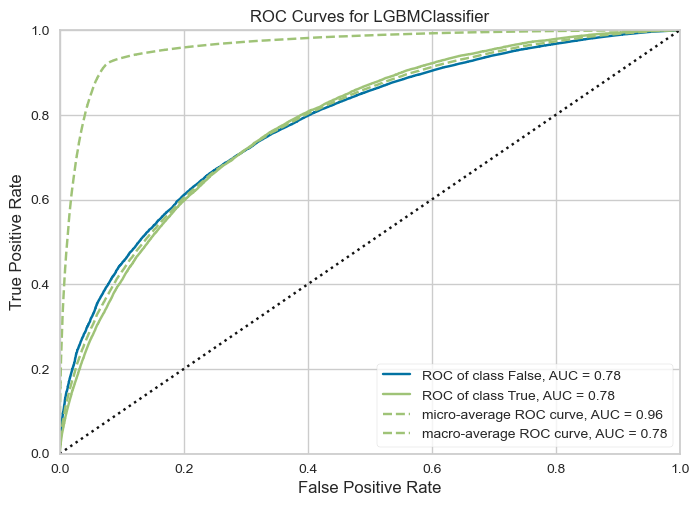

In [120]:
#AUC Plot
plot_model(tuned_lightgbm, plot = 'auc')

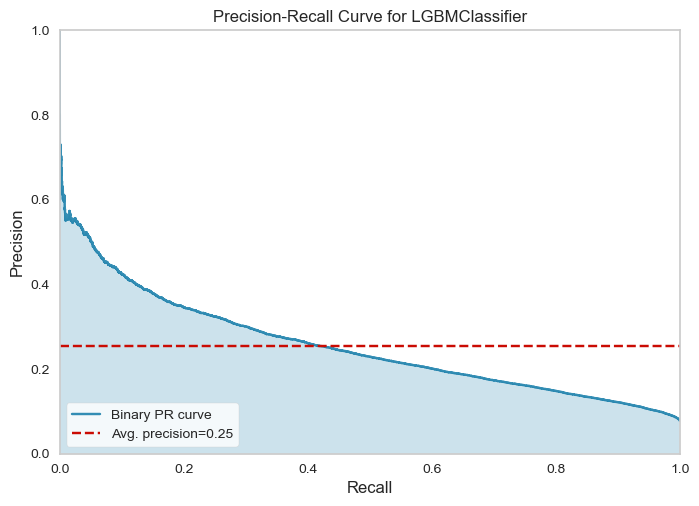

In [121]:
#Precision-Recall Plot
plot_model(tuned_lightgbm, plot = 'pr')

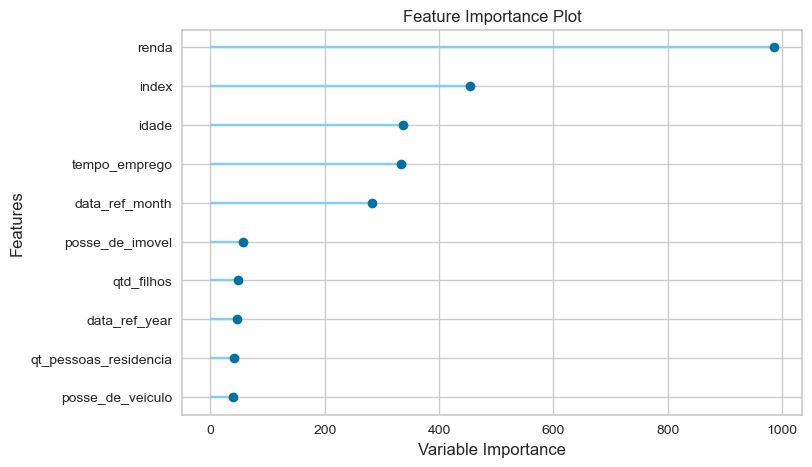

In [122]:
#Importância das variáveis (Feature Importance) Plot
plot_model(tuned_lightgbm, plot='feature')

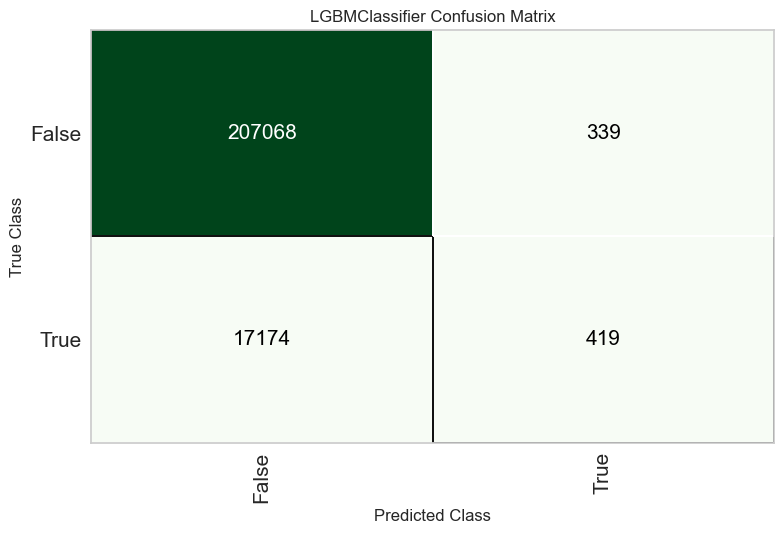

In [123]:
#Matriz de confusão (Confusion matrix
plot_model(tuned_lightgbm, plot = 'confusion_matrix')

In [124]:
#0 Predict na amostra de test / hold-out
predict_model(tuned_lightgbm);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9222,0.7823,0.0238,0.5528,0.0457,0.0395,0.1028


In [125]:
#Finalizando o modelo para deploy
final_lightgbm = finalize_model(tuned_lightgbm)

In [126]:
#Parâmetros finais do modelo Random Forest para deploy
print(final_lightgbm)

Pipeline(memory=Memory(location=None),
         steps=[('date_feature_extractor',
                 TransformerWrapper(exclude=None, include=['data_ref'],
                                    transformer=ExtractDateTimeFeatures(features=['day',
                                                                                  'month',
                                                                                  'year']))),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['index', 'qtd_filhos', 'idade',
                                             'tempo_emprego',
                                             'qt_pessoas_residencia', 'renda'],
                                    transformer=Sim...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_dep

In [127]:
evaluate_model(final_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [128]:
predict_model(final_lightgbm);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9224,0.7895,0.0282,0.5833,0.0539,0.0470,0.1160


In [129]:
#data=df_unseen?
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9124,0.7781,0.0317,0.5833,0.0601,0.0514,0.1211


,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau,prediction_label,prediction_score
0,2016-01-01,16513,F,N,S,0,Servidor público,Médio,Casado,Casa,49,6.468493,2.0,2745.780029,False,0,0.8890
1,2015-12-01,10937,M,S,N,0,Assalariado,Médio,Casado,Casa,27,3.602740,2.0,7750.080078,False,0,0.9525
2,2015-04-01,14728,F,N,N,0,Servidor público,Superior completo,Casado,Casa,34,15.306849,2.0,18519.220703,False,0,0.9797
3,2015-08-01,15173,F,S,S,0,Pensionista,Médio,Viúvo,Casa,64,NaN,1.0,14123.360352,False,0,0.9703
4,2015-12-01,14344,F,N,S,1,Empresário,Médio,União,Casa,40,3.698630,3.0,1872.109985,False,0,0.8213


In [132]:
#Salvando o modelo final
save_model(final_lightgbm,'Final lightgbm Model dez2023')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('date_feature_extractor',
                  TransformerWrapper(exclude=None, include=['data_ref'],
                                     transformer=ExtractDateTimeFeatures(features=['day',
                                                                                   'month',
                                                                                   'year']))),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['index', 'qtd_filhos', 'idade',
                                              'tempo_emprego',
                                              'qt_pessoas_residencia', 'renda'],
                                     transformer=Sim...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_ra

In [133]:
#Carregando o modelo salvo
saved_final_lightgbm = load_model('Final lightgbm Model dez2023')

Transformation Pipeline and Model Successfully Loaded


In [134]:
new_prediction = predict_model(saved_final_lightgbm, data=data_unseen)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9124,0.7781,0.0317,0.5833,0.0601,0.0514,0.1211


In [135]:
new_prediction.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau,prediction_label,prediction_score
0,2016-01-01,16513,F,N,S,0,Servidor público,Médio,Casado,Casa,49,6.468493,2.0,2745.780029,False,0,0.8890
1,2015-12-01,10937,M,S,N,0,Assalariado,Médio,Casado,Casa,27,3.602740,2.0,7750.080078,False,0,0.9525
2,2015-04-01,14728,F,N,N,0,Servidor público,Superior completo,Casado,Casa,34,15.306849,2.0,18519.220703,False,0,0.9797
3,2015-08-01,15173,F,S,S,0,Pensionista,Médio,Viúvo,Casa,64,NaN,1.0,14123.360352,False,0,0.9703
4,2015-12-01,14344,F,N,S,1,Empresário,Médio,União,Casa,40,3.698630,3.0,1872.109985,False,0,0.8213


In [141]:
saved_final_lightgbm.named_steps

{'date_feature_extractor': TransformerWrapper(exclude=None, include=['data_ref'],
                    transformer=ExtractDateTimeFeatures(features=['day', 'month',
                                                                  'year'])),
 'numerical_imputer': TransformerWrapper(exclude=None,
                    include=['index', 'qtd_filhos', 'idade', 'tempo_emprego',
                             'qt_pessoas_residencia', 'renda'],
                    transformer=SimpleImputer(add_indicator=False, copy=True,
                                              fill_value=None,
                                              keep_empty_features=False,
                                              missing_values=nan,
                                              strategy='mean',
                                              verbose='deprecated')),
 'categorical_imputer': TransformerWrapper(exclude=None,
                    include=['sexo', 'posse_de_veiculo', 'posse_de_imovel',
                

In [142]:
type(saved_final_lightgbm)

pycaret.internal.pipeline.Pipeline

In [144]:
import pickle

nome_arquivo = 'model_final.pkl'
pickle.dump(best_model, open(nome_arquivo, 'wb'))